# ARIMA Model – Complete Guide to Time Series Forecasting in Python

[Source](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

Using ARIMA model, you can forecast a time series using the series past values. In this post, we build an optimal ARIMA model from scratch and extend it to Seasonal ARIMA (SARIMA) and SARIMAX models. You will also see how to build autoarima models in python

____________________

## 1. Time Series Forecasting

A time series is a sequence where a metric is recorded over regular time intervals.

Depending on the frequency, a time series can be of yearly (ex: annual budget), quarterly (ex: expenses), monthly (ex: air traffic), weekly (ex: sales qty), daily (ex: weather), hourly (ex: stocks price), minutes (ex: inbound calls in a call canter) and even seconds wise (ex: web traffic).

Forecasting is the next step where you want to predict the future values the series is going to take.

**But why forecast?**
> Because, forecasting a time series (like demand and sales) is often of tremendous commercial value.
> 
> In most manufacturing companies, it drives the fundamental business planning, procurement and production activities. Any errors in the forecasts will ripple down throughout the supply chain or any business context for that matter. So it’s important to get the forecasts accurate in order to save on costs and is critical to success.
> 
> Not just in manufacturing, the techniques and concepts behind time series forecasting are applicable in any business.

Now forecasting a time series can be broadly divided into two types.

If you use only the previous values of the time series to predict its future values, it is called **Univariate Time Series Forecasting**.

And if you use predictors other than the series (a.k.a exogenous variables) to forecast it is called **Multi Variate Time Series Forecasting**.

This post focuses on a particular type of forecasting method called **ARIMA modeling**.
> **ARIMA**, short for **‘AutoRegressive Integrated Moving Average’**, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

## 2. Introduction to ARIMA Models

**So what exactly is an ARIMA model?**
> ARIMA, short for ‘Auto Regressive Integrated Moving Average’ is actually a class of models that ‘explains’ a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

Prefer videos?
> Know more about parameters of ARIMA and its limitations, in this [free video tutorial](https://www.machinelearningplus.com/resources/arima/understanding-arima-model/).

Any ‘non-seasonal’ time series that exhibits patterns and is not a random white noise can be modeled with ARIMA models.

An ARIMA model is characterized by 3 terms: p, d, q
> where,
>
> p is the order of the AR term
> 
> q is the order of the MA term
> 
> d is the number of differencing required to make the time series stationary

If a time series, has seasonal patterns, then you need to add seasonal terms and it becomes SARIMA, short for ‘Seasonal ARIMA’. More on that once we finish ARIMA.

So, what does the ‘order of AR term’ even mean? Before we go there, let’s first look at the ‘d’ term.

## 3. What does the p, d and q in ARIMA model mean?

The first step to build an ARIMA model is to make the time series stationary.
**Why?**
> Because, term ‘Auto Regressive’ in ARIMA means it is a linear regression model that uses its own lags as predictors. Linear regression models, as you know, work best when the predictors are not correlated and are independent of each other.

**So how to make a series stationary?**
> The most common approach is to difference it. That is, subtract the previous value from the current value. Sometimes, depending on the complexity of the series, more than one differencing may be needed.
> 
> The value of d, therefore, is the minimum number of differencing needed to make the series stationary. And if the time series is already stationary, then d = 0.

**Next, what are the ‘p’ and ‘q’ terms?**
> ‘p’ is the order of the ‘Auto Regressive’ (AR) term. It refers to the number of lags of Y to be used as predictors. 
>
> And ‘q’ is the order of the ‘Moving Average’ (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

## 4. What are AR and MA models?
**So what are AR and MA models? what is the actual mathematical formula for the AR and MA models?**
> A pure **Auto Regressive (AR only) model** is one where Yt depends only on its own lags. That is, Yt is a function of the ‘lags of Yt’. 
> $$ y_t = \alpha + \beta_1y_{t-1} + \beta_2y_{t-2} + ... +  + \beta_py_{t-p} + \epsilon_1 $$
>
> where, Y{t-1} is the lag1 of the series, beta1 is the coefficient of lag1 that the model estimates and `alpha` is the intercept term, also estimated by the model.
>
> Likewise a pure **Moving Average (MA only) model** is one where Yt depends only on the lagged forecast errors.
> $$ y_t = \alpha + \epsilon_t+ \phi_1\epsilon_{t-1}y_{t-1} + \phi_2\epsilon_{t-2}y_{t-2} + ... + \phi_q\epsilon_{t-q}y_{t-q} $$
>
> where the error terms are the errors of the autoregressive models of the respective lags. The errors Et and E(t-1) are the errors from the following equations :
> $$ y_t = \beta_1y_{t-1} + \beta_2y_{t-2} + ... +  + \beta_oy_{t-o} + \epsilon_t $$
> $$ y_{t-1} = \beta_2y_{t-2} + \beta_3y_{t-3} + ... +  + \beta_oy_{t-o} + \epsilon_{t-1} $$
>
>
>That was AR and MA models respectively.

**So what does the equation of an ARIMA model look like?**
> An **ARIMA model** is one where the time series was differenced at least once to make it stationary and you combine the AR and the MA terms. So the equation becomes:
> $$ y_t = \alpha + \beta_1y_{t-1} + \beta_2y_{t-2} + ... + \beta_py_{t-p}\epsilon_t + \phi_1\epsilon_{t-1} + \phi_2\epsilon_{t-2} + ... + \phi_q\epsilon_{t-q} $$
> 
> **ARIMA model in words:**
> 
> Predicted Yt = Constant + Linear combination Lags of Y (upto p lags) + Linear Combination of Lagged forecast errors (upto q lags)

**The objective, therefore, is to identify the values of p, d and q. But how?**
Let’s start with finding the ‘d’.

## 5. How to find the order of differencing (d) in ARIMA model

The purpose of differencing it to make the time series stationary.

But you need to be careful to not over-difference the series. Because, an over differenced series may still be stationary, which in turn will affect the model parameters.

**So how to determine the right order of differencing?**
> The right order of differencing is the minimum differencing required to get a near-stationary series which roams around a defined mean and the ACF plot reaches to zero fairly quick.
> 
> If the autocorrelations are positive for many number of lags (10 or more), then the series needs further differencing. On the other hand, if the lag 1 autocorrelation itself is too negative, then the series is probably over-differenced.
> 
> In the event, you can’t really decide between two orders of differencing, then go with the order that gives the least standard deviation in the differenced series.

**Let’s see how to do it with an example.**
> First, I am going to check if the series is stationary using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package.

**Why?**
> Because, you need differencing only if the series is non-stationary. Else, no differencing is needed, that is, d=0.

The **null hypothesis of the ADF test is that the time series is non-stationary**. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [22]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np
import pandas as pd

# Import data
df = pd.read_csv('data/wwwusage.csv', names=['value'], header=0)
                 
result = adfuller(df.value.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.464240
p-value: 0.124419


Since P-value is greater than the significance level, let’s difference the series and see how the autocorrelation plot looks like.

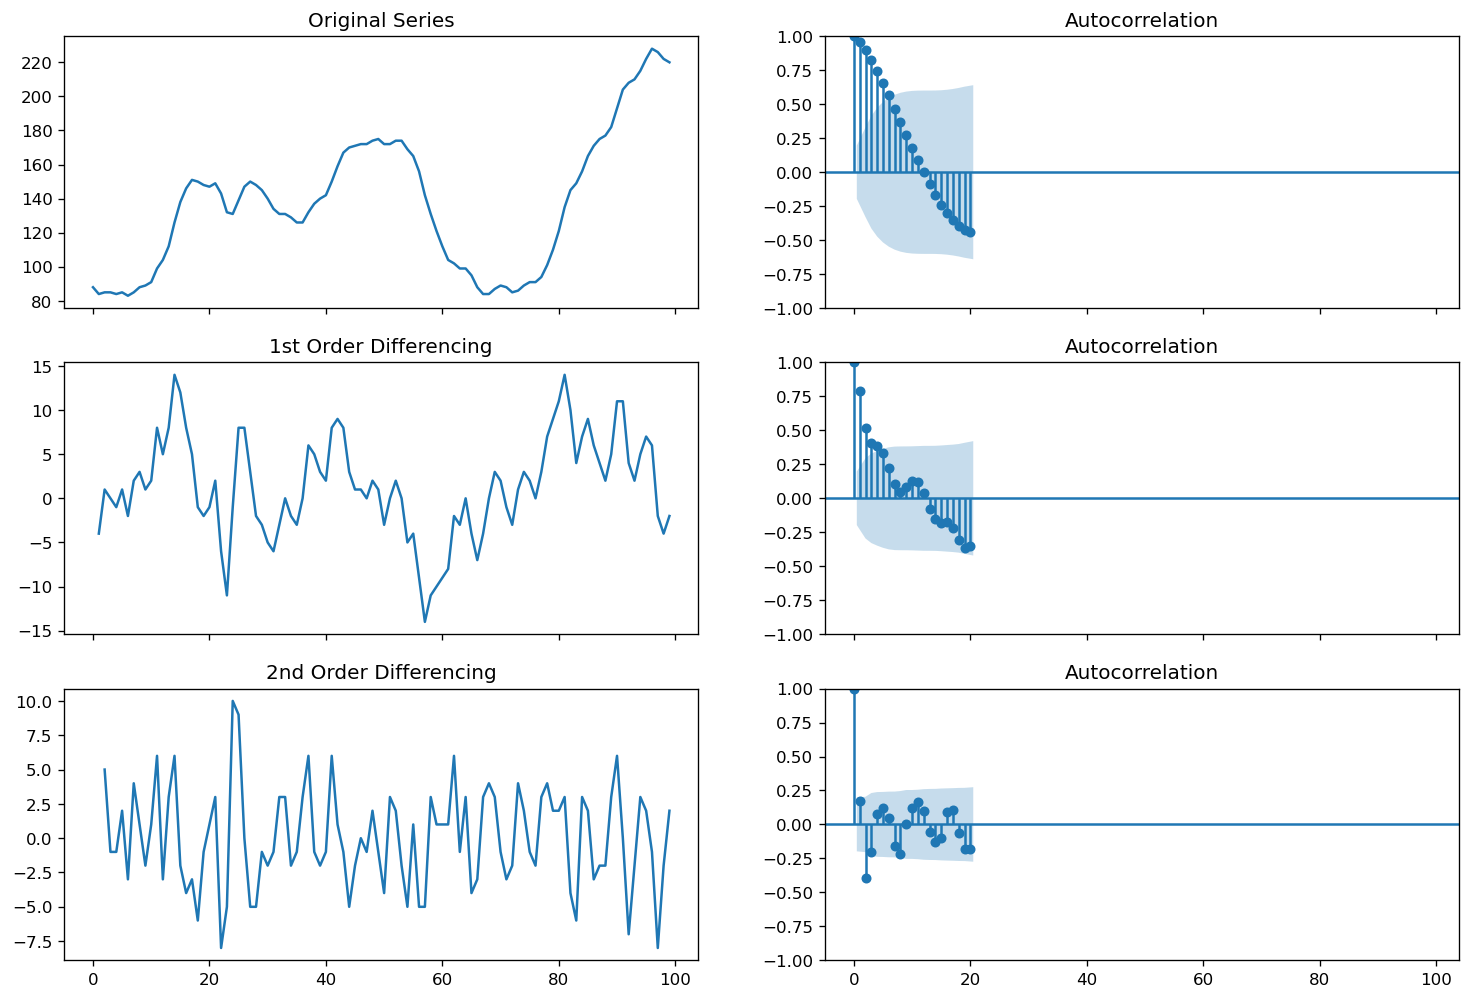

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(15, 10))
axes[0, 0].plot(df.value); axes[0, 0].set_title('Original Series')
plot_acf(df.value, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.value.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.value.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.value.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

For the above series, the time series reaches stationarity with two orders of differencing. But on looking at the autocorrelation plot for the 2nd differencing the lag goes into the far negative zone fairly quick, which indicates, the series might have been over differenced.

So, I am going to tentatively fix the order of differencing as 1 even though the series is not perfectly stationary (weak stationarity).

> Using a new package: 
>
> conda install pmdarima 

In [24]:
from pmdarima.arima.utils import ndiffs
# Perform a test of stationarity for different levels of ``d`` to
# estimate the number of differences required to make a given time
# series stationary. Will select the maximum value of ``d`` for which
# the time series is judged stationary by the statistical test.

y = df.value

## Adf Test
print(ndiffs(y, test='adf'))  # 2

# KPSS test
print(ndiffs(y, test='kpss'))  # 0

# PP test:
print(ndiffs(y, test='pp'))  # 2

2
0
2


In [25]:
# Applying ADFuller to order d=1
result = adfuller(df.value.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.722238
p-value: 0.070268


In [26]:
# Applying ADFuller to order d=2
result = adfuller(df.value.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -9.929762
p-value: 0.000000


## 6. How to find the order of the AR term (p)

The next step is to identify if the model needs any AR terms. You can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

**But what is PACF?**
> Partial autocorrelation can be imagined as the correlation between the series and its lag, after excluding the contributions from the intermediate lags. So, PACF sort of conveys the pure correlation between a lag and the series. That way, you will know if that lag is needed in the AR term or not.

**So what is the formula for PACF mathematically?**
> Partial autocorrelation of lag (k) of a series is the coefficient of that lag in the autoregression equation of Y.
> $$ y_t = \alpha_0 + \alpha_1 y_{t-1} + \alpha_2 y_{t-2} + \alpha_3 y_{t-3} $$ 
>
> That is, suppose, if Y_t is the current series and Y_t-1 is the lag 1 of Y, then the partial autocorrelation of lag 3 (Y_t-3) is the coefficient $\alpha_3$ of Y_t-3 in the above equation.

Good. Now, **how to find the number of AR terms?**
> Any autocorrelation in a stationarized series can be rectified by adding enough AR terms. So, we initially take the order of AR term to be equal to as many lags that crosses the significance limit in the PACF plot.

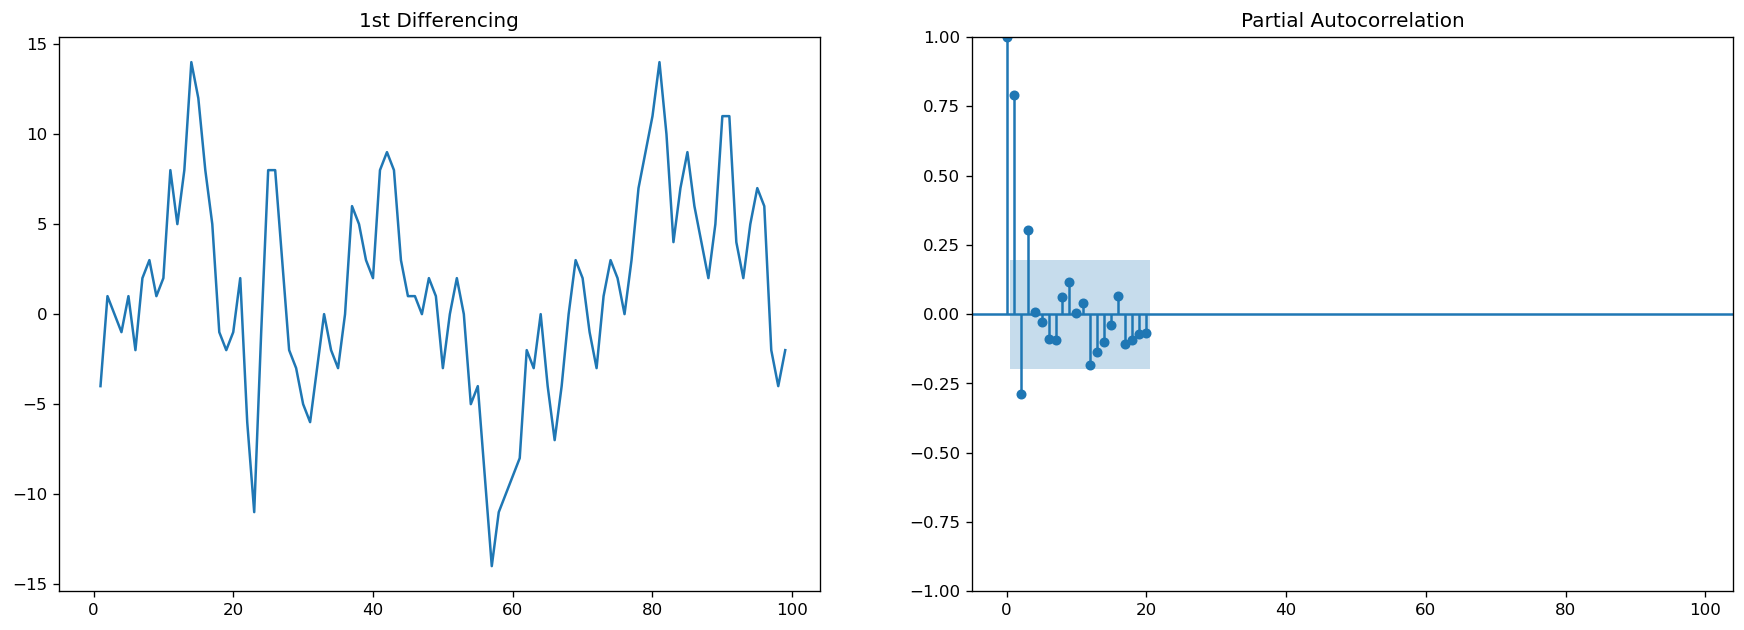

In [27]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(18,6), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.value.diff().dropna(), method='ywm', ax=axes[1])

plt.show()

You can observe that the PACF lag 1 is quite significant since is well above the significance line. Lag 2 turns out to be significant as well, slightly managing to cross the significance limit (blue region). But I am going to be conservative and tentatively fix the p as 1.

## 7. How to find the order of the MA term (q)

Just like how we looked at the PACF plot for the number of AR terms, you can look at the ACF plot for the number of MA terms. An MA term is technically, the error of the lagged forecast.

The ACF tells how many MA terms are required to remove any autocorrelation in the stationarized series.

Let’s see the autocorrelation plot of the differenced series.

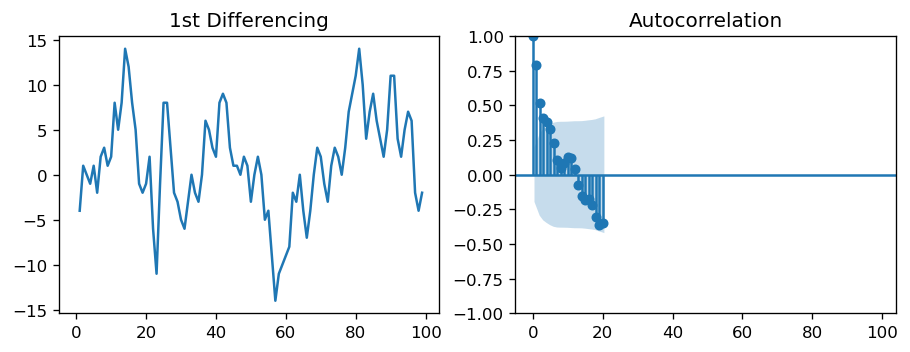

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.value.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.value.diff().dropna(), ax=axes[1])

plt.show()

Couple of lags are well above the significance line. So, let’s tentatively fix q as 2. When in doubt, go with the simpler model that sufficiently explains the Y.

## 8. How to handle if a time series is slightly under or over differenced

It may so happen that your series is slightly under differenced, that differencing it one more time makes it slightly over-differenced.

**How to handle this case?**
> If your series is slightly **under differenced**, adding one or more **additional AR terms** usually makes it up. Likewise, if it is slightly **over-differenced**, try adding an **additional MA term**.

## 9. How to build the ARIMA Model
Now that you’ve determined the values of p, d and q, you have everything needed to fit the ARIMA model. 

Let’s use the ARIMA() implementation in statsmodels package.  

(** You can also check out the free video lesson on [forecasting restaurant visitors with ARIMA](https://www.machinelearningplus.com/resources/arima/implement-arima-model/) and then check [how to test and improve the model](https://www.machinelearningplus.com/resources/arima/arima-forecast-test-results/))

In [69]:
from statsmodels.tsa.arima.model import ARIMA

# P=1, d=1, q=2 → ARIMA(order=(p,d,q)) Model
model = ARIMA(df.value, order=(1, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -254.126
Date:                Thu, 29 Jun 2023   AIC                            516.253
Time:                        19:13:40   BIC                            526.633
Sample:                             0   HQIC                           520.453
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.130      5.365      0.000       0.443       0.952
ma.L1          0.4551      0.169      2.699      0.007       0.125       0.786
ma.L2         -0.0664      0.157     -0.424      0.6

The model summary reveals a lot of information. The table in the middle is the coefficients table where the values under ‘coef’ are the weights of the respective terms.

Notice here the coefficient of the MA2 term is close to zero and the P-Value in ‘P>|z|’ column is highly insignificant. It should ideally be less than 0.05 for the respective X to be significant.

So, let’s rebuild the model without the MA2 term.

In [35]:
# 1,1,1 ARIMA Model
# P=1, d=1, q=1 → ARIMA(order=(p,d,q)) Model
model = ARIMA(df.value, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  100
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -254.150
Date:                Thu, 29 Jun 2023   AIC                            514.300
Time:                        18:45:24   BIC                            522.086
Sample:                             0   HQIC                           517.450
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6504      0.090      7.258      0.000       0.475       0.826
ma.L1          0.5256      0.088      5.994      0.000       0.354       0.697
sigma2         9.7934      1.405      6.970      0.0

The model AIC has reduced, which is good. The P Values of the AR1 and MA1 terms have improved and are highly significant (<< 0.05).

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

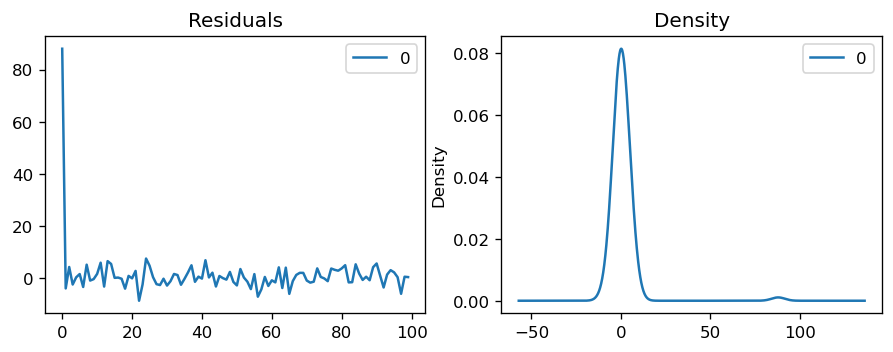

In [36]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

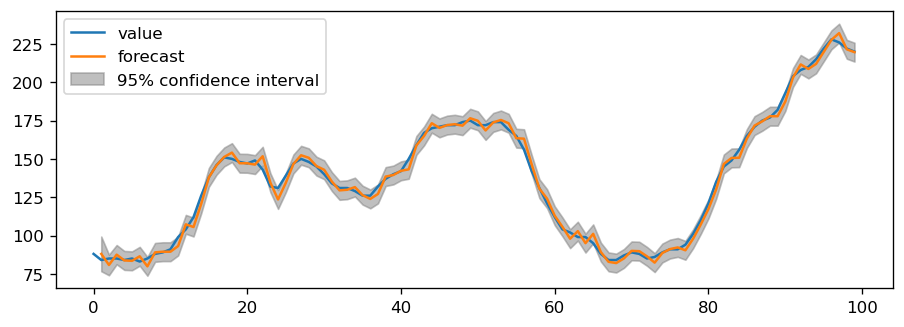

In [52]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots()
ax = df.plot(ax=ax)
plot_predict(model_fit, 1, 99, ax=ax)
plt.show()

That is, the model gets trained up until the previous value to make the next prediction. This can make the fitted forecast and actuals look artificially good.

So, we seem to have a decent ARIMA model. But is that the best?

Can’t say that at this point because we haven’t actually forecasted into the future and compared the forecast with the actual performance.

So, the real validation you need now is the **Out-of-Time cross-validation**.

## 10. How to do find the optimal ARIMA model manually using Out-of-Time Cross validation

In **Out-of-Time cross-validation**, you take few steps back in time and forecast into the future to as many steps you took back. Then you compare the forecast against the actuals.

To do out-of-time cross-validation, you need to create the training and testing dataset by splitting the time series into 2 contiguous parts in approximately 75:25 ratio or a reasonable proportion based on time frequency of series.

**Why am I not sampling the training data randomly you ask?**
> That’s because the order sequence of the time series should be intact in order to use it for forecasting.

In [53]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]

You can now build the ARIMA model on training dataset, forecast and plot it.

In [74]:
# Build Model
# model = ARIMA(train, order=(1, 1, 1))  
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit()  
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -217.055
Date:                Thu, 29 Jun 2023   AIC                            440.109
Time:                        19:15:20   BIC                            447.402
Sample:                             0   HQIC                           443.041
                                 - 85                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6597      0.097      6.790      0.000       0.469       0.850
ma.L1          0.4857      0.099      4.892      0.000       0.291       0.680
sigma2        10.1098      1.595      6.340      0.000       6.984      13.235
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.85   Prob(JB):                         0.99
Heteroskedasticity (H):               0.64   Skew:                             0.03
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
# Forecast
fc = fitted.forecast(15, alpha=0.05)  # 95% conf
fc

85    163.161121
86    167.885191
87    171.001580
88    173.057410
89    174.413605
90    175.308265
91    175.898457
92    176.287796
93    176.544637
94    176.714070
95    176.825843
96    176.899577
97    176.948218
98    176.980306
99    177.001474
Name: predicted_mean, dtype: float64

In [76]:
conf = fitted.conf_int(alpha=0.05) # 95% conf
conf

,0,1
ar.L1,0.469263,0.850103
ma.L1,0.291116,0.680255
sigma2,6.984296,13.235250


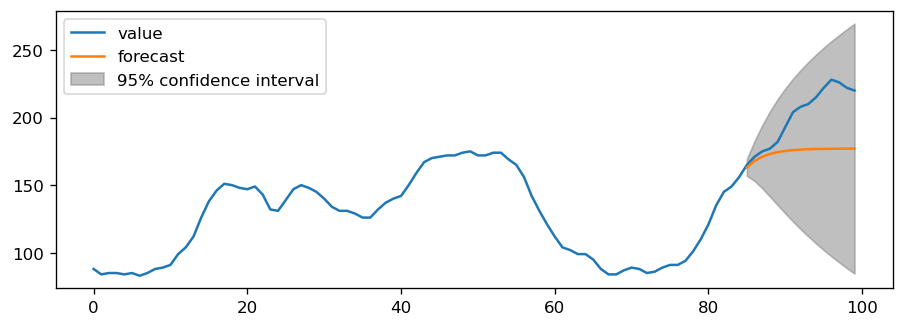

In [77]:
fig, ax = plt.subplots()
ax = df.plot(ax=ax)
plot_predict(fitted, 85, 99, ax=ax)
plt.show()

From the chart, the ARIMA(1,1,1) model seems to give a directionally correct forecast. And the actual observed values lie within the 95% confidence band. That seems fine.

But each of the predicted forecasts is consistently below the actuals. That means, by adding a small constant to our forecast, the accuracy will certainly improve. So, there is definitely scope for improvement.

So, what I am going to do is to increase the order of differencing to two, that is set d=2 and iteratively increase p to up to 5 and then q up to 5 to see which model gives least AIC and also look for a chart that gives closer actuals and forecasts.

While doing this, I keep an eye on the P values of the AR and MA terms in the model summary. They should be as close to zero, ideally, less than 0.05.

In [83]:
import warnings
warnings.filterwarnings("ignore")

# Build Model
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   85
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -214.430
Date:                Thu, 29 Jun 2023   AIC                            438.860
Time:                        19:17:04   BIC                            450.954
Sample:                             0   HQIC                           443.719
                                 - 85                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1361      0.132      8.609      0.000       0.877       1.395
ar.L2         -0.5877      0.151     -3.894      0.000      -0.884      -0.292
ar.L3          0.3018      0.128      2.357      0.0

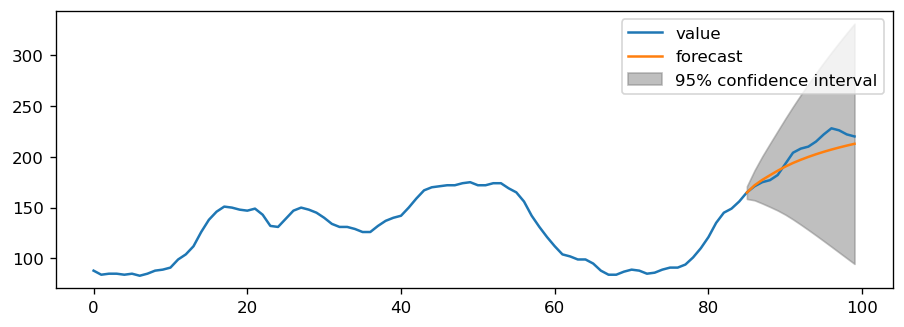

In [84]:
fig, ax = plt.subplots()
ax = df.plot(ax=ax)
plot_predict(fitted, 85, 99, ax=ax)
plt.show()

The AIC has reduced. Good. The P-values of the X terms are less the < 0.05, which is great.

So overall it’s much better.

Ideally, you should go back multiple points in time, like, go back 1, 2, 3 and 4 quarters and see how your forecasts are performing at various points in the year.

Here’s a great practice exercise: Try to go back 27, 30, 33, 36 data points and see how the forcasts performs. The forecast performance can be judged using various accuracy metrics discussed next.

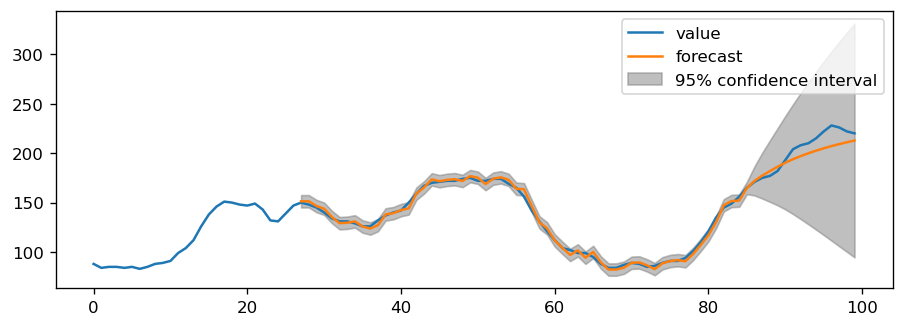

In [85]:
fig, ax = plt.subplots()
ax = df.plot(ax=ax)
plot_predict(fitted, 27, 99, ax=ax)
plt.show()

## 11. Accuracy Metrics for Time Series Forecast
The commonly used accuracy metrics to judge forecasts are:

* Mean Absolute Percentage Error (MAPE)
* Mean Error (ME)
* Mean Absolute Error (MAE)
* Mean Percentage Error (MPE)
* Root Mean Squared Error (RMSE)
* Lag 1 Autocorrelation of Error (ACF1)
* Correlation between the Actual and the Forecast (corr)
* Min-Max Error (minmax)

Typically, if you are comparing forecasts of two different series, the **MAPE**, **Correlation** and **Min-Max Error** can be used.

**Why not use the other metrics?**
> Because only the above three are percentage errors that vary between 0 and 1. That way, you can judge how good is the forecast irrespective of the scale of the series.
> 
> The other error metrics are quantities. That implies, an RMSE of 100 for a series whose mean is in 1000’s is better than an RMSE of 5 for series in 10’s. So, you can’t really use them to compare the forecasts of two different scaled time series.

In [86]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.12522186990233103,
 'me': -26.87149667505433,
 'mae': 26.87149667505433,
 'mpe': -0.12522186990233103,
 'rmse': 32.382383287490946,
 'acf1': 0.8714402831004341,
 'corr': 0.8528510787205565,
 'minmax': 0.12522186990233108}

Around 12.5% MAPE implies the model is about 87.5% accurate in predicting the next 15 observations.

Now you know how to build an ARIMA model manually.

But in industrial situations, you will be given a lot of time series to be forecasted and the forecasting exercise be repeated regularly.

So we need a way to automate the best model selection process.

## 12. How to do Auto Arima Forecast in Python

Like R’s popular auto.arima() function, the pmdarima package provides auto_arima() with similar functionality.

auto_arima() uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [96]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('data/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

## 13. How to interpret the residual plots in ARIMA model
Let’s review the residual plots using stepwise_fit.

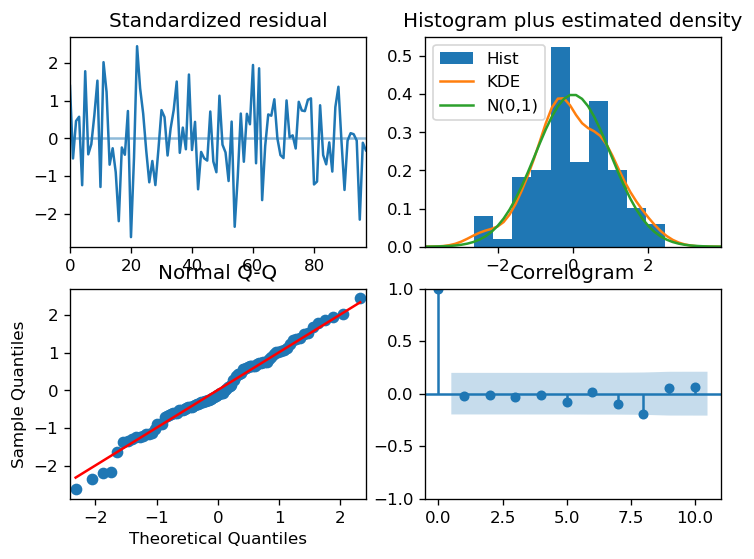

In [97]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

**So how to interpret the plot diagnostics?**
> - Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
> 
> - Top Right: The density plot suggest normal distribution with mean zero.
>
> Bottom left: All the dots should fall perfectly in line with the red line. Any significant deviations would imply the distribution is skewed.
> 
> Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

Overall, it seems to be a good fit. Let’s forecast.

In [109]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

In [110]:
fc

100    219.397177
101    218.273262
102    216.399224
103    214.561387
104    213.063466
105    211.637252
106    210.079727
107    208.456739
108    206.874736
109    205.332154
110    203.781675
111    202.211787
112    200.640374
113    199.077121
114    197.516644
115    195.953288
116    194.387964
117    192.823404
118    191.259906
119    189.696347
120    188.132303
121    186.568161
122    185.004208
123    183.440346
dtype: float64

In [111]:
confint

array([[ 213.16006645,  225.63428815],
       [ 202.87119781,  233.67532553],
       [ 191.47610099,  241.32234644],
       [ 180.10304808,  249.01972546],
       [ 168.22702868,  257.89990429],
       [ 155.1649133 ,  268.1095908 ],
       [ 140.95030606,  279.20914869],
       [ 125.94482728,  290.96865004],
       [ 110.30237585,  303.44709709],
       [  93.96828784,  316.69602077],
       [  76.90355086,  330.65979942],
       [  59.15584116,  345.26773272],
       [  40.78680106,  360.49394624],
       [  21.82165359,  376.33258776],
       [   2.2664249 ,  392.76686358],
       [ -17.86520226,  409.77177739],
       [ -38.55133975,  427.32726872],
       [ -59.77294521,  445.41975247],
       [ -81.51685034,  464.03666222],
       [-103.77162815,  483.16432117],
       [-126.52498943,  502.78959467],
       [-149.76471732,  522.90103933],
       [-173.47992589,  543.48834126],
       [-197.66089335,  564.54158535]])

In [112]:
index_of_fc

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123])

In [113]:
# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

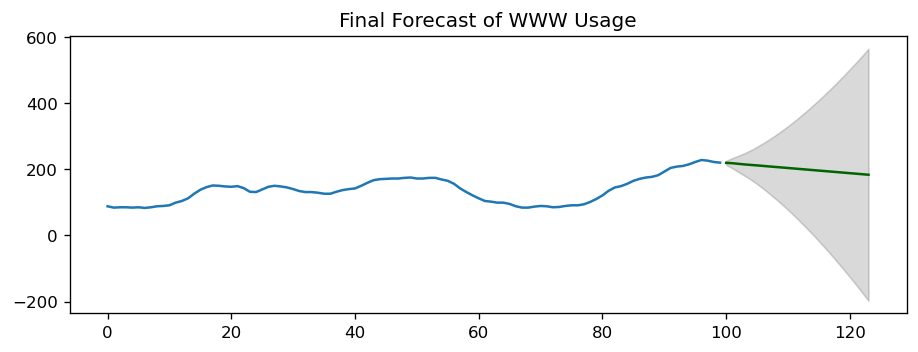

In [114]:
# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

## 14. How to automatically build SARIMA model in python
The problem with plain ARIMA model is it does not support seasonality.

If your time series has defined seasonality, then, go for SARIMA which uses seasonal differencing.

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from previous season.

So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series.

If your model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.

Here’s some practical advice on building SARIMA model:
> As a general rule, set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. Try to keep only either SAR or SMA terms if your model has seasonal components.

Let’s build an SARIMA model on 'a10' – the drug sales dataset.

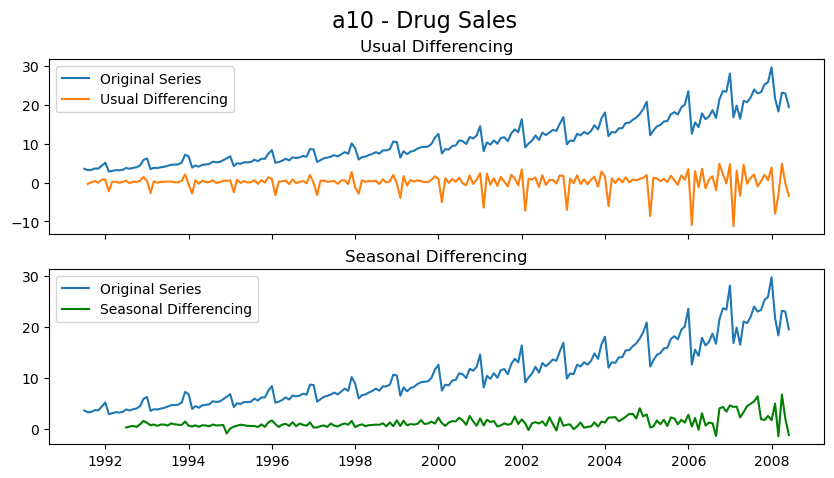

In [115]:
# Import
data = pd.read_csv('data/time-serie-data.csv', parse_dates=['date'], index_col='date')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

As you can clearly see, the seasonal spikes is intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

Let’s build the SARIMA model using pmdarima‘s auto_arima(). To do that, you need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1.

In [116]:
# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.09 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=0.83 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.36 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.679, Time=1.08 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.09 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.36 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.12 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.963
Date:                            Thu, 29 Jun 2023   AIC                            523.926
Time:                                    19:51:26   BIC                            549.986
Sample:                                07-01-1991   HQIC                           534.481
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0054      0.009      0.583      0.560      -0.013       0.023
ar.L1          0.9760      0.019     52.205      0.000       0.939       1.013
ma.L1         -0.9097      0.057    -15.915      0.000      -1.022      -0.798
ma.L2          0.2161      0.059      3.657      0.000       0.100       0.332
ar.S.L12       0.8400      0.156      5.374      0.000       0.534       1.146
ma.S.L12      -1.5724      0.175     -8.961      0.000      -1.916      -1.228
ma.S.L24       0.7573      0.109      6.926      0.000       0.543       0.972
sigma2         0.7569      0.066     11.393      0.000       0.627       0.887
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               142.92
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):              14.49   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model has estimated the AIC and the P values of the coefficients look significant. Let’s look at the residual diagnostics plot.

The best model SARIMAX(3, 0, 0)x(0, 1, 1, 12) has an AIC of 528.6 and the P Values are significant.

Let’s forecast for the next 24 months.

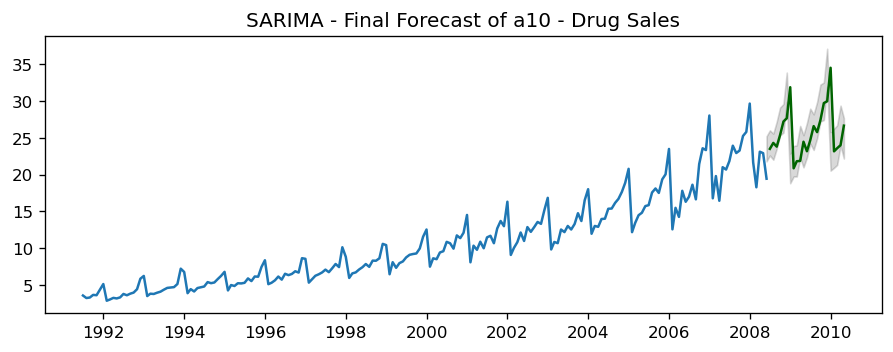

In [117]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

There you have a nice forecast that captures the expected seasonal demand pattern.

## 15. How to build SARIMAX Model with exogenous variable
The SARIMA model we built is good. I would stop here typically.

But for the sake of completeness, let’s try and force an external predictor, also called, ‘exogenous variable’ into the model. This model is called the SARIMAX model.

The only requirement to use an exogenous variable is you need to know the value of the variable during the forecast period as well.

For the sake of demonstration, I am going to use the seasonal index from the classical seasonal decomposition on the latest 36 months of data.

Why the seasonal index? Isn’t SARIMA already modeling the seasonality, you ask?

You are correct.

But also, I want to see how the model looks if we force the recent seasonality pattern into the training and forecast.

Secondly, this is a good variable for demo purpose. So you can use this as a template and plug in any of your variables into the code. The seasonal index is a good exogenous variable because it repeats every frequency cycle, 12 months in this case.

So, you will always know what values the seasonal index will hold for the future forecasts.

In [118]:
# Import Data
data = pd.read_csv('data/time-serie-data.csv', parse_dates=['date'], index_col='date')

Let’s compute the seasonal index so that it can be forced as a (exogenous) predictor to the SARIMAX model.

In [119]:
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

The exogenous variable (seasonal index) is ready. Let’s build the SARIMAX model.

In [120]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=0.31 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.12 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.09 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.02 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.10 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=0.78 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=0.36 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.679, Time=1.15 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.09 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=0.35 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.13 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.963
Date:                            Thu, 29 Jun 2023   AIC                            523.926
Time:                                    19:53:39   BIC                            549.986
Sample:                                07-01-1991   HQIC                           534.481
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0054      0.009      0.583      0.560      -0.013       0.023
ar.L1          0.9760      0.019     52.205      0.000       0.939       1.013
ma.L1         -0.9097      0.057    -15.915      0.000      -1.022      -0.798
ma.L2          0.2161      0.059      3.657      0.000       0.100       0.332
ar.S.L12       0.8400      0.156      5.374      0.000       0.534       1.146
ma.S.L12      -1.5724      0.175     -8.961      0.000      -1.916      -1.228
ma.S.L24       0.7573      0.109      6.926      0.000       0.543       0.972
sigma2         0.7569      0.066     11.393      0.000       0.627       0.887
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):               142.92
Prob(Q):                              0.61   Prob(JB):                         0.00
Heteroskedasticity (H):              14.49   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

So, we have the model with the exogenous term. But the coefficient is very small for x1, so the contribution from that variable will be negligible. Let’s forecast it anyway.

We have effectively forced the latest seasonal effect of the latest 3 years into the model instead of the entire history.

Alright let’s forecast into the next 24 months. For this, you need the value of the seasonal index for the next 24 months.

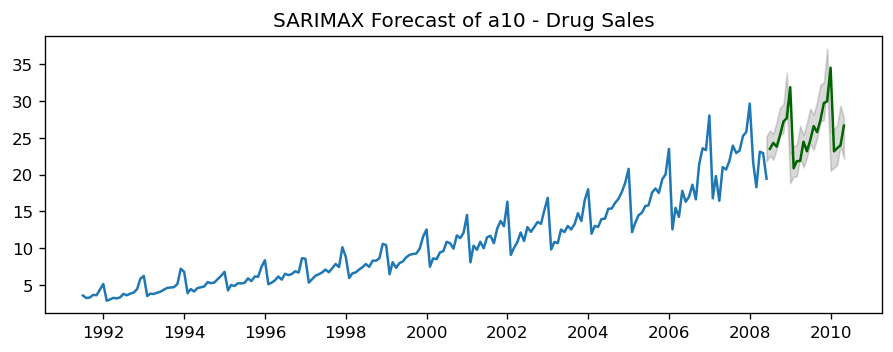

In [124]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.seasonal, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

## 16. Practice Exercises
In the AirPassengers dataset, go back 12 months in time and build the SARIMA forecast for the next 12 months.

* Is the series stationary? If not what sort of differencing is required?
* What is the order of your best model?
* What is the AIC of your model?
* What is the MAPE achieved in OOT cross-validation?
* What is the order of the best model predicted by auto_arima() method?

## 17. Conclusion
Congrats if you reached this point. Give yourself a BIG hug if you were able to solve the practice exercises.

I really hope you found this useful?

We have covered a lot of concepts starting from the very basics of forecasting, AR, MA, ARIMA, SARIMA and finally the SARIMAX model. If you have any questions please write in the comments section. Meanwhile, I will work on the next article.

____________________